因子分析
只能做到挖掘出因子

In [11]:
# 数据处理
import pandas as pd
import numpy as np

# 绘图
import seaborn as sns
import matplotlib.pyplot as plt
# 因子分析
from factor_analyzer import FactorAnalyzer

#

In [14]:
# 读入数据与预处理
# 使用 pandas 的 read_csv 函数从名为 "bfi.csv" 的 CSV 文件中读取数据
# 参数 index_col=0 指定第一列（索引为0的列）作为数据的行索引
df = pd.read_csv("data.csv", index_col=0)

# 使用 reset_index 函数将之前设置的索引列重置为默认的整数索引
# 参数 drop=True 表示不保留原来的索引列，而是用默认的整数索引替代
df = df.reset_index(drop=True)

# 打印 DataFrame，显示处理后的数据
# print(df)

# 去掉 DataFrame 中的无效字段 "gender", "education" 和 "age"
# 参数 axis=1 表示按列进行操作，inplace=True 表示在原始 DataFrame 上进行修改
df.drop(["gender", "education", "age"], axis=1, inplace=True)

# 去掉包含空值的行
# inplace=True 表示在原始 DataFrame 上进行修改
df.dropna(inplace=True)


KMO检验和Bartlett's球状检验

In [16]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value = calculate_bartlett_sphericity(df)
chi_square_value, p_value
# 最好等于零

(18146.065577235022, 0.0)

In [17]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model 
# 最好大于0.6

0.8486452309468395

因子挖掘
在不知道有几个因子的前提下 
个数选取原则
1. 断点图（Scree Plot）：断点图是一种可视化方法，它将特征值绘制为曲线图。您可以观察曲线的拐点，通常在拐点之前的因子数量是合适的选择
2. Kaiser准则：Kaiser准则是最常用的方法之一。根据Kaiser准则，您应该选择特征值大于1的因子。特征值表示了因子的方差，因此较大的特征值对方差的解释程度更高。特征值小于1的因子通常被认为是噪音


In [19]:
# 创建 FactorAnalyzer 对象，指定要提取的因子数量为 25  这里的25是因为数据集一共有二十五个这样的因子
# 参数 rotation=None 表示不进行因子旋转
faa = FactorAnalyzer(n_factors=25, rotation=None)

# 使用 FactorAnalyzer 对象拟合数据集 df，进行因子分析
faa.fit(df)

# 获得因子分析的结果，包括特征值（eigenvalues）和特征向量（eigenvectors）
# 特征值（ev）表示每个因子的方差解释量，特征向量（v）包含了每个因子对原始变量的贡献
ev, v = faa.get_eigenvalues()

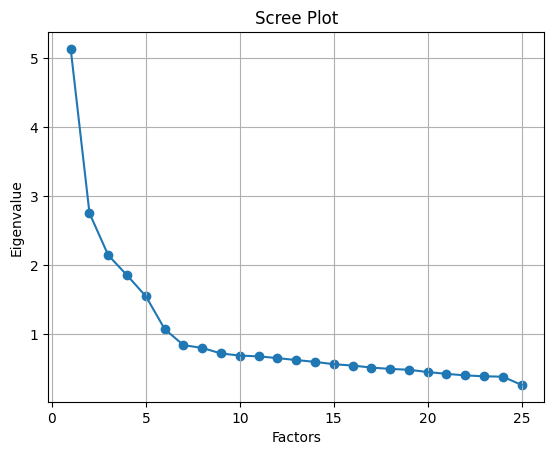

In [20]:
 # 同样的数据绘制散点图和折线图 这种图 要求同时绘制散点图和折线图
 # 该范围从1开始（包含1）到 df 数据框（DataFrame）的列数
plt.scatter(range(1, df.shape[1] + 1), ev)
plt.plot(range(1, df.shape[1] + 1), ev)

# 显示图的标题和xy轴的名字
# 最好使用英文，中文可能乱码
plt.title("Scree Plot")  
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")

plt.grid()  # 显示网格
plt.show()  # 显示图形

所以因子就选择5了 

In [26]:

faa_5 = FactorAnalyzer(5,rotation='varimax')
faa_5.fit(df)
# 公因子方差
faa_5.get_communalities()
#  查看每个变量的公因子方差数据
pd.DataFrame(faa_5.get_communalities(),index=df.columns)
# 变量个数*因子个数
pd.DataFrame(faa_5.loadings_,index=df.columns)

,0,1,2,3,4
A1,0.111126,0.040465,0.022798,-0.428166,-0.077931
A2,0.029588,0.213716,0.139037,0.626946,0.062139
A3,0.009357,0.317848,0.109331,0.650743,0.056196
A4,-0.066476,0.204566,0.230584,0.435624,-0.112700
A5,-0.122113,0.393034,0.087869,0.537087,0.066708
C1,0.010416,0.070184,0.545824,0.038878,0.209584
C2,0.089574,0.033270,0.648731,0.102782,0.115434
C3,-0.030855,0.023907,0.557036,0.111578,-0.005183
C4,0.240410,-0.064984,-0.633806,-0.037498,-0.107535
C5,0.290318,-0.176395,-0.562467,-0.047525,0.036822


In [29]:
#总方差贡献
faa_5.get_factor_variance()
# 获取绝对值之后画图
df1 = pd.DataFrame(np.abs(faa_5.loadings_),index=df.columns)
print(df1)

           0         1         2         3         4
A1  0.111126  0.040465  0.022798  0.428166  0.077931
A2  0.029588  0.213716  0.139037  0.626946  0.062139
A3  0.009357  0.317848  0.109331  0.650743  0.056196
A4  0.066476  0.204566  0.230584  0.435624  0.112700
A5  0.122113  0.393034  0.087869  0.537087  0.066708
C1  0.010416  0.070184  0.545824  0.038878  0.209584
C2  0.089574  0.033270  0.648731  0.102782  0.115434
C3  0.030855  0.023907  0.557036  0.111578  0.005183
C4  0.240410  0.064984  0.633806  0.037498  0.107535
C5  0.290318  0.176395  0.562467  0.047525  0.036822
E1  0.042819  0.574835  0.033144  0.104813  0.058795
E2  0.244743  0.678731  0.102483  0.112517  0.042010
E3  0.024180  0.536816  0.083010  0.257906  0.280877
E4  0.115614  0.646833  0.102023  0.306101  0.073422
E5  0.036145  0.504069  0.312899  0.090354  0.213739
N1  0.786807  0.078923  0.045997  0.216363  0.084704
N2  0.754109  0.027301  0.030568  0.193744  0.010304
N3  0.731721  0.061430  0.067084  0.027712  0.

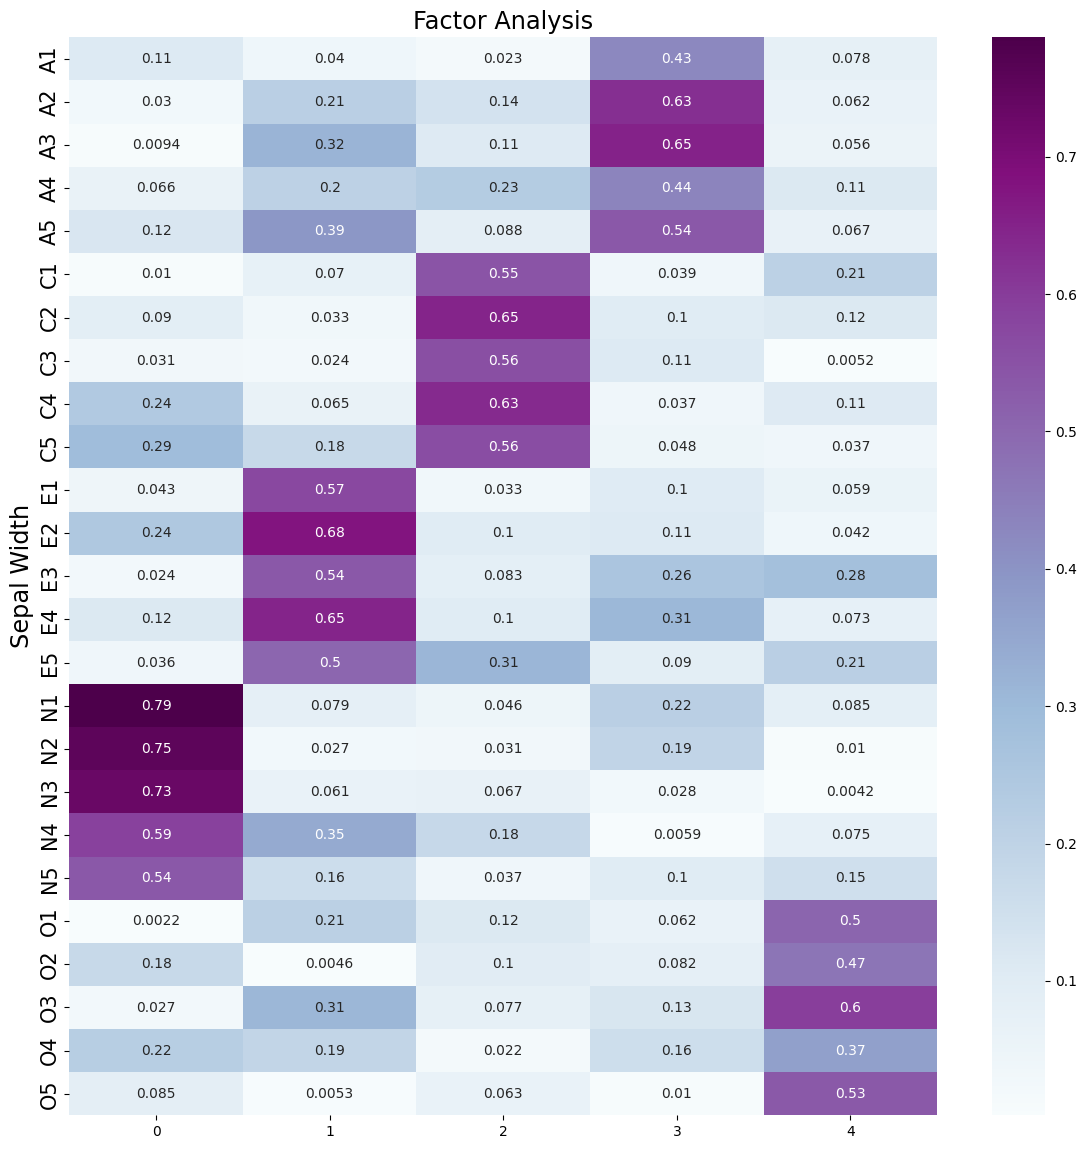

In [31]:
# 导入绘图库 seaborn 和 matplotlib.pyplot
import seaborn as sns
import matplotlib.pyplot as plt

# 创建一个图形对象，设置图形的大小为14x14英寸
plt.figure(figsize=(14, 14))

# 使用热图（heatmap）绘制因子分析的结果，df1 是要绘制的数据集
# 参数 annot=True 表示在热图中显示数据值
# 参数 cmap="BuPu" 设置颜色映射为蓝紫色调
ax = sns.heatmap(df1, annot=True, cmap="BuPu")

# 设置y轴标签的字体大小
ax.yaxis.set_tick_params(labelsize=15)

# 设置图的标题，字体大小为 "xx-large"
plt.title("Factor Analysis", fontsize="xx-large")

# 设置y轴的标签
plt.ylabel("Sepal Width", fontsize="xx-large")

# 显示绘制的图形
plt.show()

# 如果需要保存图像，可以取消下面的注释并保存图像
# 注意：保存图像时，取消下面的注释并确保文件名后缀与图像格式一致（如 .png、.jpg 等）
# plt.savefig("factorAnalysis.png", dpi=500)


结论就是我们选取的这几个因子 很好的按照类别反应了原来的25个因子

(下面这段代码是顺便加的 )

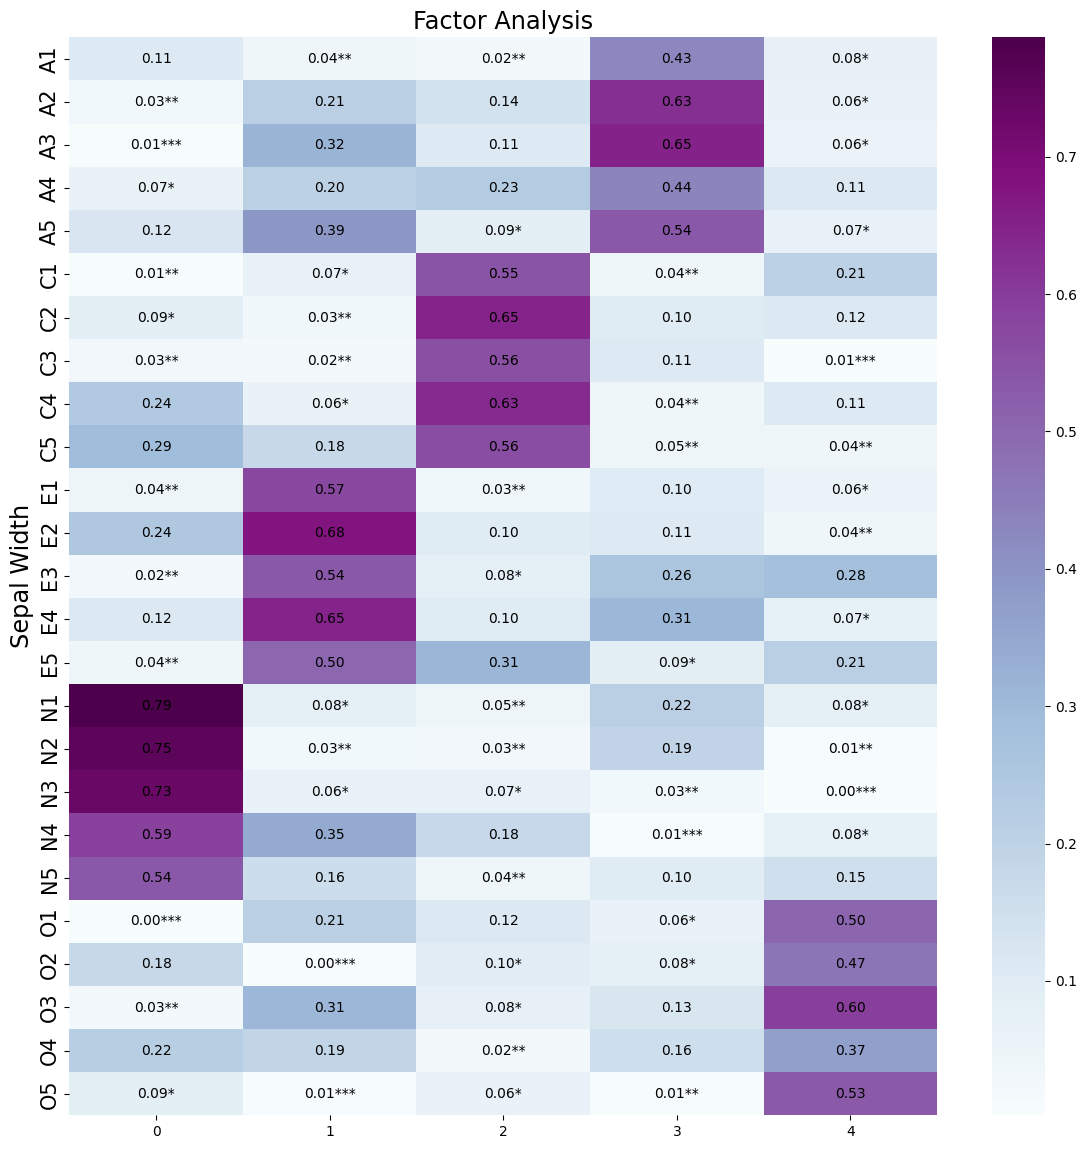

<Figure size 640x480 with 0 Axes>

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# 创建一个图形对象，设置图形的大小为14x14英寸
plt.figure(figsize=(14, 14))

# 使用热图（heatmap）绘制因子分析的结果，df1 是要绘制的数据集
# 参数 annot=True 表示在热图中显示数据值
# 参数 cmap="BuPu" 设置颜色映射为蓝紫色调
ax = sns.heatmap(df1, annot=False, cmap="BuPu")

# 添加数值标签并根据不同的数值显示不同的符号
for i in range(df1.shape[0]):
    for j in range(df1.shape[1]):
        value = df1.iloc[i, j]
        if value < 0.01:
            label = '***'
        elif value < 0.05:
            label = '**'
        elif value < 0.1:
            label = '*'
        else:
            label = ''
        plt.text(j + 0.5, i + 0.5, f'{value:.2f}{label}', ha='center', va='center', color='black', fontsize=10)

# 设置y轴标签的字体大小
ax.yaxis.set_tick_params(labelsize=15)

# 设置图的标题，字体大小为 "xx-large"
plt.title("Factor Analysis", fontsize="xx-large")

# 设置y轴的标签
plt.ylabel("Sepal Width", fontsize="xx-large")

# 显示绘制的图形
plt.show()
plt.savefig("factorAnalysis.png", dpi=500)

In [30]:
# 给出基于数据集的全部展示
df2 = pd.DataFrame(faa_5.transform(df))
print(df2)

             0         1         2         3         4
0    -0.439830  0.103897 -1.216713 -0.696215 -1.519449
1     0.084369  0.559311 -0.601521 -0.189341 -0.248384
2     0.520534  0.318235  0.025646 -0.751136  0.204503
3    -0.197064  0.057696 -1.019263  0.064286 -1.029492
4    -0.329835  0.408754 -0.058843 -0.820454 -0.691042
...        ...       ...       ...       ...       ...
2431  1.308046 -1.152403 -0.104197 -1.146411  0.412042
2432  0.732472  0.252206 -0.587511 -0.317781  1.025564
2433 -0.223267  0.721169  0.787110 -1.058480  0.925103
2434  0.920521  0.749337  0.070953 -2.135145  0.673460
2435 -1.689983 -1.352403 -0.081433 -1.854889 -0.163880

[2436 rows x 5 columns]


主成分分析
其实可以整点大佬们的分析上去 也方便写论文
本讲将介绍主成分分析(Principal Component Analysis,PCA)，
主成分分析是一种降维算法，它能将多个指标转换为少数几
个主成分，这些主成分是原始变量的线性组合，且彼此之间
互不相关，其能反映出原始数据的大部分信息。一般来说，
当研究的问题涉及到多变量且变量之间存在很强的相关性时，
我们可考虑使用主成分分析的方法来对数据进行简化

消除噪音的同时  会损失信息
尽可能使得新变量方差大一点 证明过程略 看计算过程吧
1. 计算样本的相关系数矩阵
2. 计算特征值和特征向量
3. 计算累计贡献率

分析得到的主成分含义

       A1   A2   A3   A4   A5   C1   C2   C3   C4   C5  ...   N4   N5   O1  \
0     2.0  4.0  3.0  4.0  4.0  2.0  3.0  3.0  4.0  4.0  ...  2.0  3.0  3.0   
1     2.0  4.0  5.0  2.0  5.0  5.0  4.0  4.0  3.0  4.0  ...  5.0  5.0  4.0   
2     5.0  4.0  5.0  4.0  4.0  4.0  5.0  4.0  2.0  5.0  ...  2.0  3.0  4.0   
3     4.0  4.0  6.0  5.0  5.0  4.0  4.0  3.0  5.0  5.0  ...  4.0  1.0  3.0   
4     2.0  3.0  3.0  4.0  5.0  4.0  4.0  5.0  3.0  2.0  ...  4.0  3.0  3.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2795  6.0  1.0  3.0  3.0  3.0  6.0  6.0  6.0  1.0  1.0  ...  NaN  1.0  6.0   
2796  2.0  4.0  4.0  3.0  5.0  2.0  3.0  4.0  4.0  3.0  ...  3.0  3.0  6.0   
2797  2.0  3.0  5.0  2.0  5.0  5.0  5.0  5.0  1.0  1.0  ...  3.0  1.0  5.0   
2798  5.0  2.0  2.0  4.0  4.0  5.0  5.0  5.0  2.0  6.0  ...  4.0  1.0  5.0   
2799  2.0  3.0  1.0  4.0  2.0  5.0  5.0  3.0  3.0  3.0  ...  1.0  1.0  3.0   

      O2   O3   O4   O5  gender  education  age  
0      6  3.0

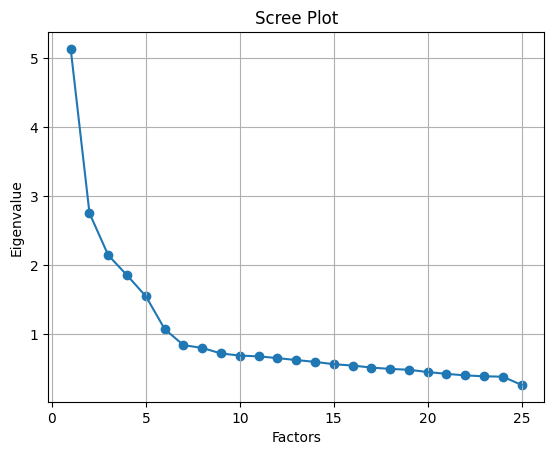

[0.20537245 0.11007547 0.08570808 0.0740931  0.06192651 0.0429433
 0.03358156 0.03196825 0.02875957 0.02752355 0.02705493 0.02607199
 0.02493012 0.02386251 0.02252363 0.02173221 0.0205807  0.01978013
 0.01930558 0.01795684 0.01693464 0.01602686 0.01551218 0.01527427
 0.01050156]
[0.20537245 0.31544791 0.40115599 0.4752491  0.53717561 0.58011891
 0.61370047 0.64566871 0.67442828 0.70195183 0.72900677 0.75507876
 0.78000888 0.80387139 0.82639503 0.84812724 0.86870794 0.88848807
 0.90779365 0.92575049 0.94268513 0.95871199 0.97422417 0.98949844
 1.        ]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[[ 1.10201844e-01 -1.57186580e-02 -1.18324195e-01 -2.95091665e-02
  -4.90281326e-01 -4.22041130e-01  1.94209508e-01 -4.02350279e-02
  -7.79063301e-04 -1.95247791e-01  2.07382731e-01 -2.30831724e-01
  -1.95679947e-01 -3.92696140e-01 -4.16728246e-02  2.21350677e-02]
 [-2.18902378e-01  1.88570821e-01  1.53904571e-01 -9.05757986e-02
   3.33324199e-01  1.62960225e-01 -1.59138842e-01 -2.

In [46]:
# 数据处理
import pandas as pd
import numpy as np
 
# 绘图
import seaborn as sns
import matplotlib.pyplot as plt
 
df = pd.read_csv(r"data.csv", encoding='gb18030', index_col=0).reset_index(drop=True)
print(df)
# 去掉 DataFrame 中的无效字段 "gender", "education" 和 "age"
# 参数 axis=1 表示按列进行操作，inplace=True 表示在原始 DataFrame 上进行修改
df.drop(["gender", "education", "age"], axis=1, inplace=True)

# 去掉包含空值的行
# inplace=True 表示在原始 DataFrame 上进行修改
df.dropna(inplace=True)



def meanX(dataX):
    return np.mean(dataX,axis=0)#axis=0表示依照列来求均值。假设输入list,则axis=1
average = meanX(df)
print(average)
 
#查看列数和行数
m, n = np.shape(df)
print(m,n)
 

 

#进行标准化 首先求均值 其次求标准差
n,m=np.shape(df)

# 标准化数据
data=df
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)  # 标准差
normalized_data = (data - mean) / std_dev
print(normalized_data)
# 计算标准化样本的协方差矩阵
covX = np.cov(normalized_data, rowvar=False)
print(covX)
 
 
#计算协方差阵的特征值和特征向量
featValue, featVec=  np.linalg.eig(covX)  #求解协方差矩阵的特征值和特征向量
print(featValue, featVec)
 
####下面没有区分#######
 
#对特征值进行排序并输出 降序
featValue = sorted(featValue)[::-1]
print(featValue)
 
#绘制散点图和折线图
# 同样的数据绘制散点图和折线图
plt.scatter(range(1, df.shape[1] + 1), featValue)
plt.plot(range(1, df.shape[1] + 1), featValue)
 
# 显示图的标题和xy轴的名字
# 最好使用英文，中文可能乱码
plt.title("Scree Plot")
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
 
plt.grid()  # 显示网格
plt.show()  # 显示图形
 
#求特征值的贡献度
gx = featValue/np.sum(featValue)
print(gx)
 
#求特征值的累计贡献度
lg = np.cumsum(gx)
print(lg)
 
#选出主成分
k=[i for i in range(len(lg)) if lg[i]<0.85]
k = list(k)
print(k)
 
#选出主成分对应的特征向量矩阵
selectVec = np.matrix(featVec.T[k]).T
selectVe=selectVec*(-1)
print(selectVec)
 

 

 
# 保存图片
# plt.savefig("factorAnalysis", dpi=500)

熵权法 和基于topsis对熵权法的修正
多指标决策
The Entrophy Weight Method(EWM) is an objective weighting method, based on the principlethat the greater the degree of dispersion, the greater the degree of differentiation, and thus the moreinformation can be derived. We employ EWM to determine the weights of normalized indicators.Since all of all KPIs are normalized and are of benefit-type, the normalization process for eachindicator is:
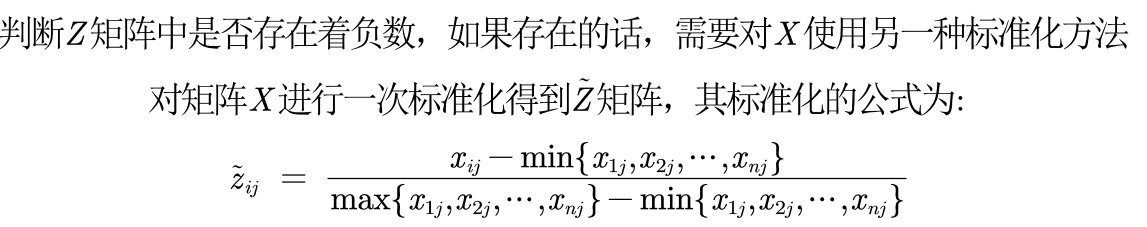  再次重新标准化之后 再求概率矩阵

In [ ]:
import numpy as np
import math

def entropy_weight(matrix):
    """
    熵权法计算权重
    参数:
    matrix (numpy.ndarray): 输入的决策矩阵，每一行代表一个样本，每一列代表一个指标。
    
    返回:
    weights (numpy.ndarray): 计算得到的权重。
    """
    n,m=matrix.shape
    
    # 将矩阵标准化为概率矩阵/概率矩阵
    # 有负数怎么办 逻辑哪里去 换成除以2范数
    prob_matrix = matrix / np.linalg.norm(matrix, axis=0)
 
    # 计算信息熵 对于每一列乘上自然对数之后求和
    entropy = -(np.sum(prob_matrix * np.log(prob_matrix), axis=0))/math.log(n)

    # 计算权重 或者说信息效用 信息效用越大 对应信息就越多
    weights = (1 - entropy) / np.sum(1 - entropy)

    return weights





In [ ]:
import numpy as np

def topsis(matrix, weights=None, is_benefit_criterion=None):
    """
    TOPSIS法的Python实现

    参数:
    matrix (numpy.ndarray): 决策矩阵，每一行代表一个方案，每一列代表一个属性。
    weights (list): 属性权重，默认为None。如果为None，则假设所有属性权重相同。
    is_benefit_criterion (list): 是否为利益准则，1表示是，0表示否。默认为None。

    返回:
    rankings (numpy.ndarray): 方案的排名。
    """
    # 标准化决策矩阵
    normalized_matrix = matrix / np.linalg.norm(matrix, axis=0)

    # 加权标准化决策矩阵
    if weights is not None:
        weighted_matrix = normalized_matrix * weights
    else:
        weighted_matrix = normalized_matrix

    # 确定理想解和负理想解
    if is_benefit_criterion is None:
        is_benefit_criterion = [1] * matrix.shape[1]  # 默认所有属性均为利益准则

    ideal_solution = np.max(weighted_matrix, axis=0)
    negative_ideal_solution = np.min(weighted_matrix, axis=0)

    # 计算方案到理想解和负理想解的距离
    positive_distance = np.linalg.norm(weighted_matrix - ideal_solution, axis=1)
    negative_distance = np.linalg.norm(weighted_matrix - negative_ideal_solution, axis=1)

    # 计算综合得分
    closeness = negative_distance / (positive_distance + negative_distance)

    # 排序得到排名
    rankings = np.argsort(closeness) + 1  # 加1是为了将排名从1开始而不是从0开始

    return rankings


In [ ]:
# 示例数据
decision_matrix = np.array([
    [3, 4, 5],
    [1, 2, 3],
    [4, 3, 2],
    [2, 5, 4]
])

# 计算权重
weights = entropy_weight(decision_matrix)
topsis(decision_matrix,weights)

array([2, 4, 1, 3], dtype=int64)

计算得到的权重为: [0.29541482 0.35229259 0.35229259]
熵权法和其它评价模型的整合
1. 基于熵权法对Topsis模型的修正
- 越高（大）越好，这样的指标称为极大型指标（效益型指标）。
- 越少（越小）越好，这样的指标称为极小型指标（成本型指标）
2. 主成分分析